# Count plots for BANDWIDTH VALUES CHOSEN BY ALGORITHMS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


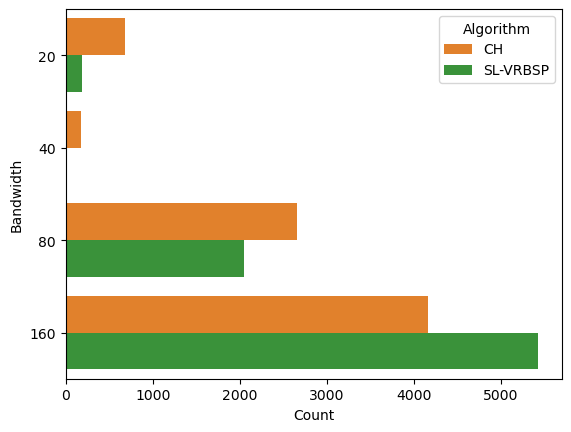

In [69]:
import pandas as pd
import seaborn as sns
import math

def generate_count_plot(algorithms, L):
    print()

L=256
group='uniform'
frequency_mip = [0 for _ in range(45)]
frequency_ch = [0 for _ in range(45)]
frequency_vrbsp = [0 for _ in range(45)]
for i in range(1, 31):
    mip = f'/Users/jjaneto/Desktop/results-novo/{group}/milp/U_{L}/sol{L}_{i}.sol'
    ch = f'/Users/jjaneto/Desktop/results-novo/{group}/ch/U_{L}/sol{L}_{i}.sol'
    vrbsp = f'/Users/jjaneto/Desktop/results-novo/{group}/slvr/U_{L}/sol{L}_{i}.sol'
    with open(mip, 'r') as f:
        lines = f.readlines()
        for line in lines:
            l, c, t, _ = line.split(' ')
            frequency_mip[int(c)] += 1
            
    with open(ch, 'r') as f:
        lines = f.readlines()
        for line in lines:
            l, c, t, _ = line.split(' ')
            frequency_ch[int(c)] += 1
            
    with open(vrbsp, 'r') as f:
        lines = f.readlines()
        for line in lines:
            l, c, t = line.split(' ')
            frequency_vrbsp[int(c)] += 1
            

# print(frequency)
seila = []

for ch, times in enumerate(frequency_mip):
    for _ in range(times):
        if ch <= 24: 
            seila.append(['B&C-F', 20])
        elif ch <= 36:
            seila.append(['B&C-F', 40])
        elif ch <= 42:
            seila.append(['B&C-F', 80])
        else:
            seila.append(['B&C-F', 160])
            
            
for ch, times in enumerate(frequency_ch):
    for _ in range(times):
        if ch <= 24: 
            seila.append(['CH', 20])
        elif ch <= 36:
            seila.append(['CH', 40])
        elif ch <= 42:
            seila.append(['CH', 80])
        else:
            seila.append(['CH', 160])
            
for ch, times in enumerate(frequency_vrbsp):
    for _ in range(times):
        if ch <= 24: 
            seila.append(['SL-VRBSP', 20])
        elif ch <= 36:
            seila.append(['SL-VRBSP', 40])
        elif ch <= 42:
            seila.append(['SL-VRBSP', 80])
        else:
            seila.append(['SL-VRBSP', 160])
        
# print(seila)
df = pd.DataFrame(data=seila, columns=['Algorithm', 'Bandwidth'])
# df

ax = sns.countplot(data=df, y='Bandwidth', hue='Algorithm', palette=['#ff7f0e', '#2ca02c'])
ax.set(xlabel='Count')
fig = ax.get_figure()
fig.savefig(f'y__l{L}_results_bw_{group}.eps')

# Count plots of bandwidths of GAMMA VALUES

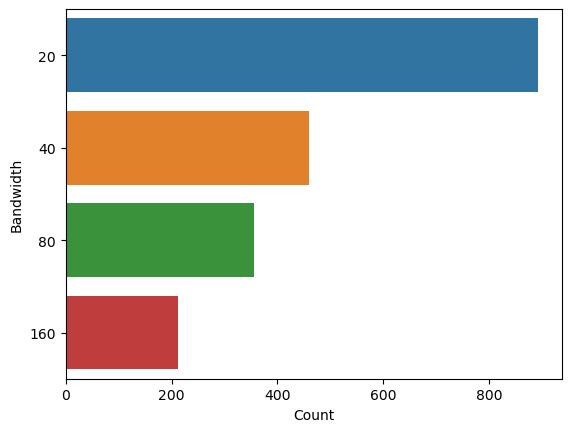

In [21]:
L_=[64] #,16,32,64,128,256,512,1024,2048]
group='random'
for L in L_:
    frequency_bw = []
    for i in range(1, 31):
        file = f'/Users/jjaneto/git/master-thesis/instances/{group}/U_{L}/MD-VRBSP_U_{L}_{i}.txt'
#         file = f'/Users/jjaneto/Desktop/results-novo/MD-VRBSP_U_{L}_{i}.txt'
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines[4 + 2 * L: 4 + 3 * L]:
                datarate = float(line.rstrip('\n'))
                if datarate <= 143.4: 
                    frequency_bw.append(20)
                elif datarate <= 286.8:
                    frequency_bw.append(40)
                elif datarate <= 600.5:
                    frequency_bw.append(80)
                else:
                    frequency_bw.append(160)

#     print(frequency_bw)
    ax = sns.countplot(y=frequency_bw)
    ax.set(ylabel='Bandwidth', xlabel='Count')
    fig = ax.get_figure()
    fig.savefig(f'y__gamma_l{L}_{group}.eps')



## Statistical test

# Percentage difference

In [73]:
import pandas as pd
L=[128]
for l in L:
    df_ch = pd.read_csv(f'/Users/jjaneto/Desktop/results-novo/random/slvr/U_{l}/obj', header=None, sep='\t')
    df_vrbsp = pd.read_csv(f'/Users/jjaneto/Desktop/results-novo/random/milp/U_{l}/results{l}', header=None, sep='\t')
    
    arr = []
    for i in range(21):
        arr.append([df_vrbsp[1][i], df_ch[1][i]])
        
    df = pd.DataFrame(arr, columns=['vrbsp', 'ch'])
#     print(df)
#     print(df.describe())

    sum = 0.0
    arr = []
    for i in range(21):
#         assert df['ch'][i] >= df['vrbsp'][i], (l, i)
        sum += (df['ch'][i] - df['vrbsp'][i]) / df['vrbsp'][i]
        arr.append((df['ch'][i] - df['vrbsp'][i]) / df['vrbsp'][i])
        
#     print(arr)
    print("{:.2f}".format(100.0 * sum / 30.0))
            
            
# data_of = [[f1, f2] in f1, f2 for zip(obj_ch, obj_vrbsp)]
# df = pd.DataFrame(data=data_of)

30.22


# Network topology example

64 64


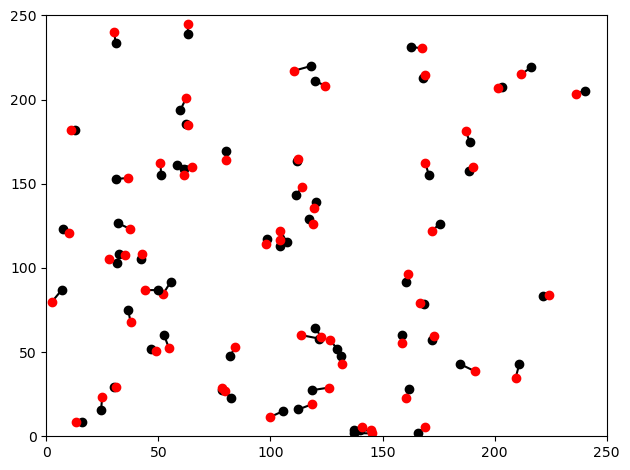

<Figure size 640x480 with 0 Axes>

In [17]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import secrets
import math

secretsGenerator = secrets.SystemRandom()


def euclidean(a, b, c, d):
    return math.sqrt(math.pow(a - c, 2) + math.pow(b - d, 2))


n = 64
dim = 250
start_points = (
    []
)  # [(54.6, 35.2), (55.5, 32.7), (66.5, 23.7), (75.5, 47.8), (89.3, 19.7)]
end_points = []  # [(38.9, 44.3), (46.7, 52.2), (72.0, 1.4), (62.3, 18.9), (80.8, 26.2)]

receivers = [[secretsGenerator.uniform(0.0, dim) for _ in range(2)] for _ in range(n)]
senders = []

sqrt_2 = math.sqrt(2)
for elem in receivers:
    c1 = 0.0
    c2 = 0.0
    while True:
        c1 = secretsGenerator.uniform(0.0, float(dim))
        c2 = secretsGenerator.uniform(0.0, float(dim))
        if euclidean(elem[0], elem[1], c1, c2) <= (6 * sqrt_2):
            break

    senders.append([c1, c2])

print(len(senders), len(receivers))

for i in range(n):
    start_points.append((receivers[i][0], receivers[i][1]))
    end_points.append((senders[i][0], senders[i][1]))

plt.xlim(0, 250)
plt.ylim(0, 250)

for line in zip(start_points, end_points):
    line = np.array(line)
    # print(line[:])
    plt.plot(line[:, 0], line[:, 1], color="black", zorder=1)
    plt.scatter(line[0, 0], line[0, 1], marker="o", color="black", zorder=2)
    plt.scatter(line[1, 0], line[1, 1], marker="o", color="red", zorder=2)

plt.tight_layout()
plt.show()
plt.savefig("./instance.eps")
